In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../WineCSVs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

../WineCSVs\BlackTie0916.csv
../WineCSVs\MoscatoKWV0916.csv
../WineCSVs\MQSensorDataMoscatoKWV.csv
../WineCSVs\MQSensorDataTallHorse.csv
../WineCSVs\NamaquaCabSav0916.csv
../WineCSVs\OldMoscatoWine.csv
../WineCSVs\SilverMynSauvBlanc0917.csv
../WineCSVs\SixWineData.csv
../WineCSVs\Sophie0916.csv
../WineCSVs\TallHorse0916.csv
../WineCSVs\TrainCSV1309.csv


In [69]:
import warnings

warnings.filterwarnings('ignore')

In [70]:
data = '../WineCSVs/SixWineData.csv'

df = pd.read_csv(data)

# Data Exploration And Cleaning

In [71]:
df.head()

,yyyy-mm-dd timestamp,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity,Target
0,2024-09-16 15:38:24,648,862,817,416,940,757,682,681,723,35.92,83830.13,37.0,61.0,Sophie0916
1,2024-09-16 15:38:24,647,862,815,417,939,758,683,679,724,35.94,83587.56,37.0,61.0,Sophie0916
2,2024-09-16 15:38:25,646,863,815,419,939,759,682,677,725,35.95,83399.22,37.0,61.0,Sophie0916
3,2024-09-16 15:38:25,648,862,816,416,941,758,682,678,724,35.96,83237.08,37.0,61.0,Sophie0916
4,2024-09-16 15:38:26,648,860,815,418,939,757,680,675,724,35.96,83117.88,37.0,61.0,Sophie0916


In [72]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['yyyy-mm-dd timestamp', 'MQ6', 'MQ5', 'MQ4', 'MQ7', 'MQ3', 'MQ8', 'MQ2',
       'MQ135', 'MQ9', 'BMPTemperature', 'Pressure(Pa)', 'DHTTemperature',
       'Humidity', 'Target'],
      dtype='object')

In [73]:
# check distribution of target_class column

df['Target'].value_counts()

Target
Sophie0916            582
MoscatoKWV1609        575
SilverMynSauvBlanc    562
BlackTie0916          557
NamaquaCabSav0916     549
TallHorse0916         543
Name: count, dtype: int64

In [74]:
# Ensure the 'Target' column is of string type (if it's not already)
df['Target'] = df['Target'].astype(str)

# View the percentage distribution of target_class column
df['Target'].value_counts() / float(len(df))


Target
Sophie0916            0.172803
MoscatoKWV1609        0.170724
SilverMynSauvBlanc    0.166865
BlackTie0916          0.165380
NamaquaCabSav0916     0.163005
TallHorse0916         0.161223
Name: count, dtype: float64

In [75]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy-mm-dd timestamp  3368 non-null   object 
 1   MQ6                   3368 non-null   int64  
 2   MQ5                   3368 non-null   int64  
 3   MQ4                   3368 non-null   int64  
 4   MQ7                   3368 non-null   int64  
 5   MQ3                   3368 non-null   int64  
 6   MQ8                   3368 non-null   int64  
 7   MQ2                   3368 non-null   int64  
 8   MQ135                 3368 non-null   int64  
 9   MQ9                   3368 non-null   int64  
 10  BMPTemperature        3368 non-null   float64
 11  Pressure(Pa)          3368 non-null   object 
 12  DHTTemperature        3368 non-null   float64
 13  Humidity              3368 non-null   float64
 14  Target                3368 non-null   object 
dtypes: float64(3), int64(

In [76]:
import pandas as pd

# Convert relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['MQ6', 'MQ5', 'MQ4', 'MQ7', 'MQ3', 'MQ8', 'MQ2', 'MQ135', 'MQ9', 'BMPTemperature', 'DHTTemperature', 'Humidity', 'Pressure(Pa)']

# Initialize a dictionary to store NaN counts
nan_counts = {}

# Count NaN values before conversion
for column in columns_to_convert:
    nan_counts[column] = df[column].isna().sum()

# Convert columns to numeric, coercing errors to NaN
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Count NaN values after conversion
for column in columns_to_convert:
    nan_counts[column] += df[column].isna().sum()

# Drop rows with any NaN values in the specified columns
rows_before_dropping = df.shape[0]
df = df.dropna(subset=columns_to_convert)
rows_after_dropping = df.shape[0]

# Calculate total rows dropped
total_rows_dropped = rows_before_dropping - rows_after_dropping

# Print NaN counts and total rows dropped
print("NaN counts before and after conversion:")
for column, count in nan_counts.items():
    print(f"{column}: {count} NaN values")

print(f"\nTotal rows dropped: {total_rows_dropped}")

# Check the resulting DataFrame
print("\nDataFrame info after cleaning:")
print(df.info())


NaN counts before and after conversion:
MQ6: 0 NaN values
MQ5: 0 NaN values
MQ4: 0 NaN values
MQ7: 0 NaN values
MQ3: 0 NaN values
MQ8: 0 NaN values
MQ2: 0 NaN values
MQ135: 0 NaN values
MQ9: 0 NaN values
BMPTemperature: 0 NaN values
DHTTemperature: 0 NaN values
Humidity: 0 NaN values
Pressure(Pa): 1 NaN values

Total rows dropped: 1

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, 0 to 3367
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy-mm-dd timestamp  3367 non-null   object 
 1   MQ6                   3367 non-null   int64  
 2   MQ5                   3367 non-null   int64  
 3   MQ4                   3367 non-null   int64  
 4   MQ7                   3367 non-null   int64  
 5   MQ3                   3367 non-null   int64  
 6   MQ8                   3367 non-null   int64  
 7   MQ2                   3367 non-null   int64  
 8   MQ135           

In [77]:
# check for missing values in variables

df.isnull().sum()

yyyy-mm-dd timestamp    0
MQ6                     0
MQ5                     0
MQ4                     0
MQ7                     0
MQ3                     0
MQ8                     0
MQ2                     0
MQ135                   0
MQ9                     0
BMPTemperature          0
Pressure(Pa)            0
DHTTemperature          0
Humidity                0
Target                  0
dtype: int64

In [78]:
# view summary statistics in numerical variables

round(df.describe(),2)

,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
count,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00,3367.00
mean,473.83,840.68,772.24,397.35,953.34,753.36,673.05,699.06,723.75,36.39,84639.10,62.56,57.11
std,109.89,37.10,48.55,39.73,208.87,33.78,18.00,27.33,4.81,11.86,1928.70,1455.83,16.50
min,293.00,487.00,70.00,323.00,326.00,692.00,653.00,645.00,706.00,35.82,36.03,37.00,37.00
25%,416.00,821.00,753.00,364.00,943.00,731.00,663.00,675.00,721.00,36.01,83728.92,37.00,55.00
50%,464.00,852.00,774.00,410.00,950.00,748.00,668.00,694.00,724.00,36.20,84402.15,37.00,57.00
75%,521.00,864.00,798.00,430.00,955.00,763.00,676.00,719.00,726.00,36.33,85359.59,38.00,58.00
max,750.00,903.00,887.00,861.00,9513.00,833.00,752.00,768.00,734.00,724.00,91575.50,84513.21,749.00


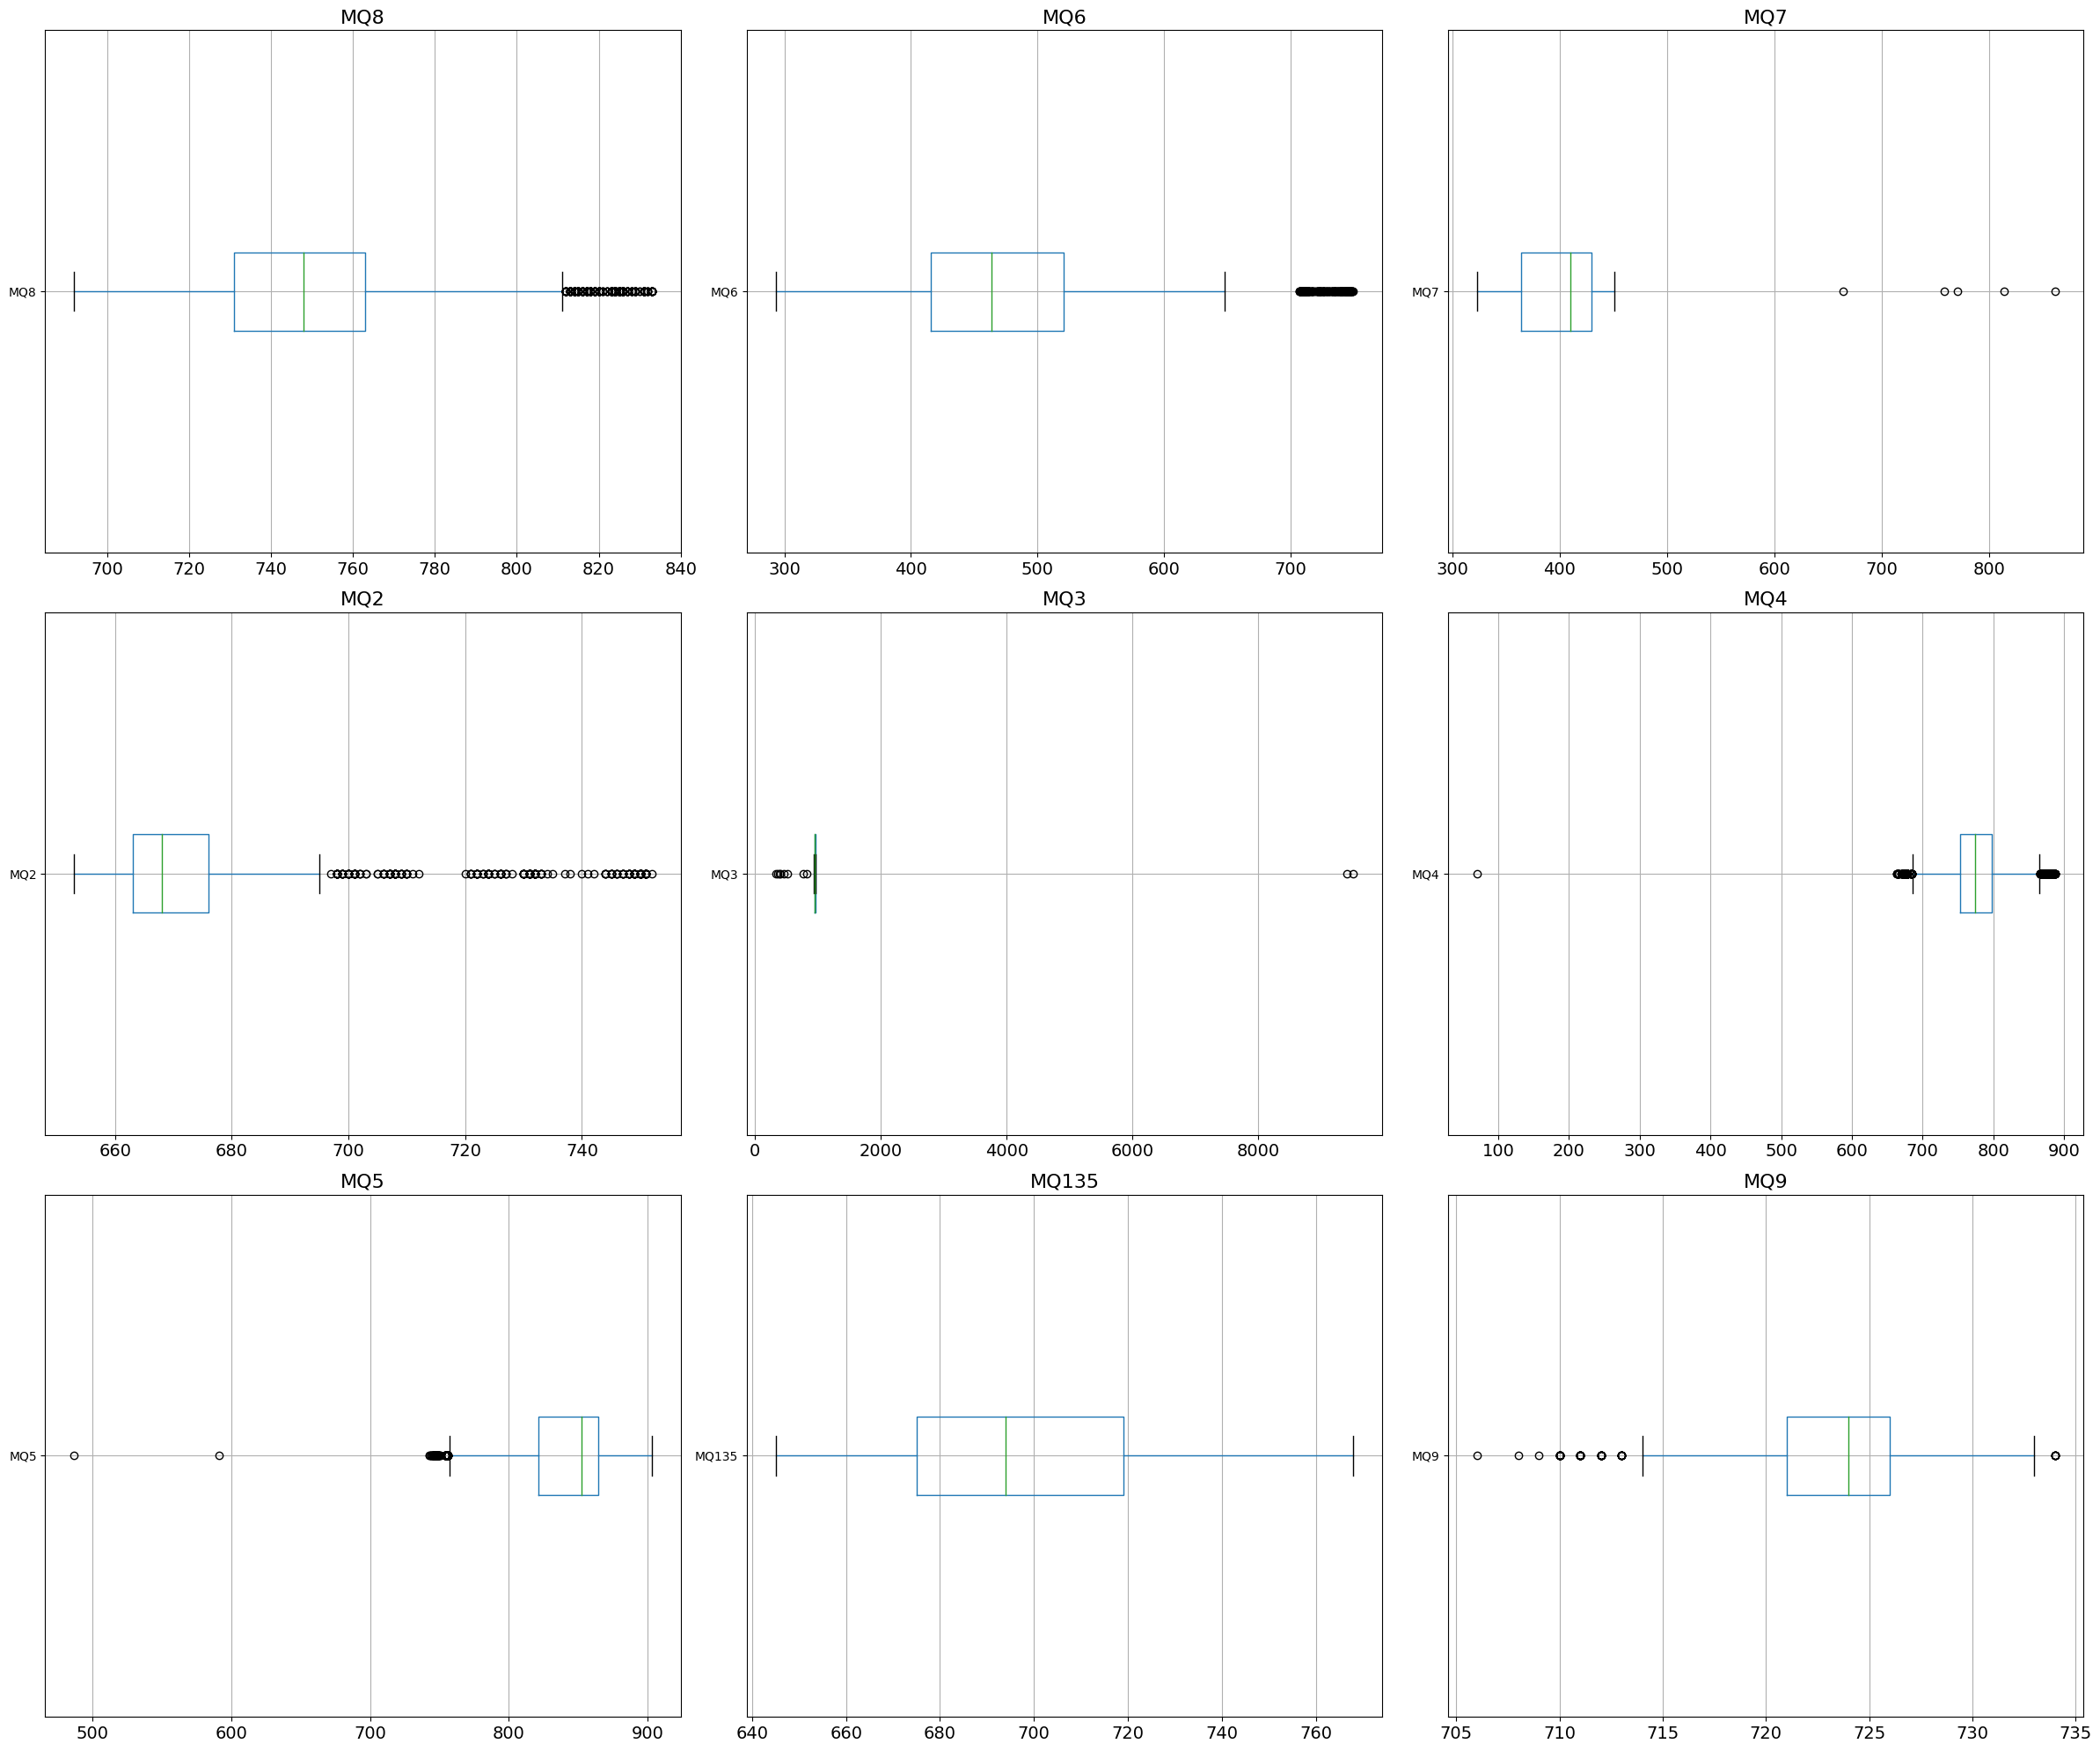

In [79]:
# draw boxplots to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(24, 20))

# List of columns to plot
columns = ['MQ8', 'MQ6', 'MQ7', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ135', 'MQ9']

# Loop through each subplot and assign the respective boxplot
for i, ax in enumerate(axes.flat):
    if i < len(columns):  # Ensure we only plot existing columns
        df.boxplot(column=columns[i], ax=ax, vert=False)  # Horizontal boxplot
        ax.set_title(columns[i], fontsize=16)  # Put the column label on top
        ax.set_xlabel('')  # Remove the x-axis label
        ax.tick_params(axis='x', labelsize=14)  # Increase font size of x-axis ticks

# Adjust layout and display
plt.tight_layout()
plt.show()


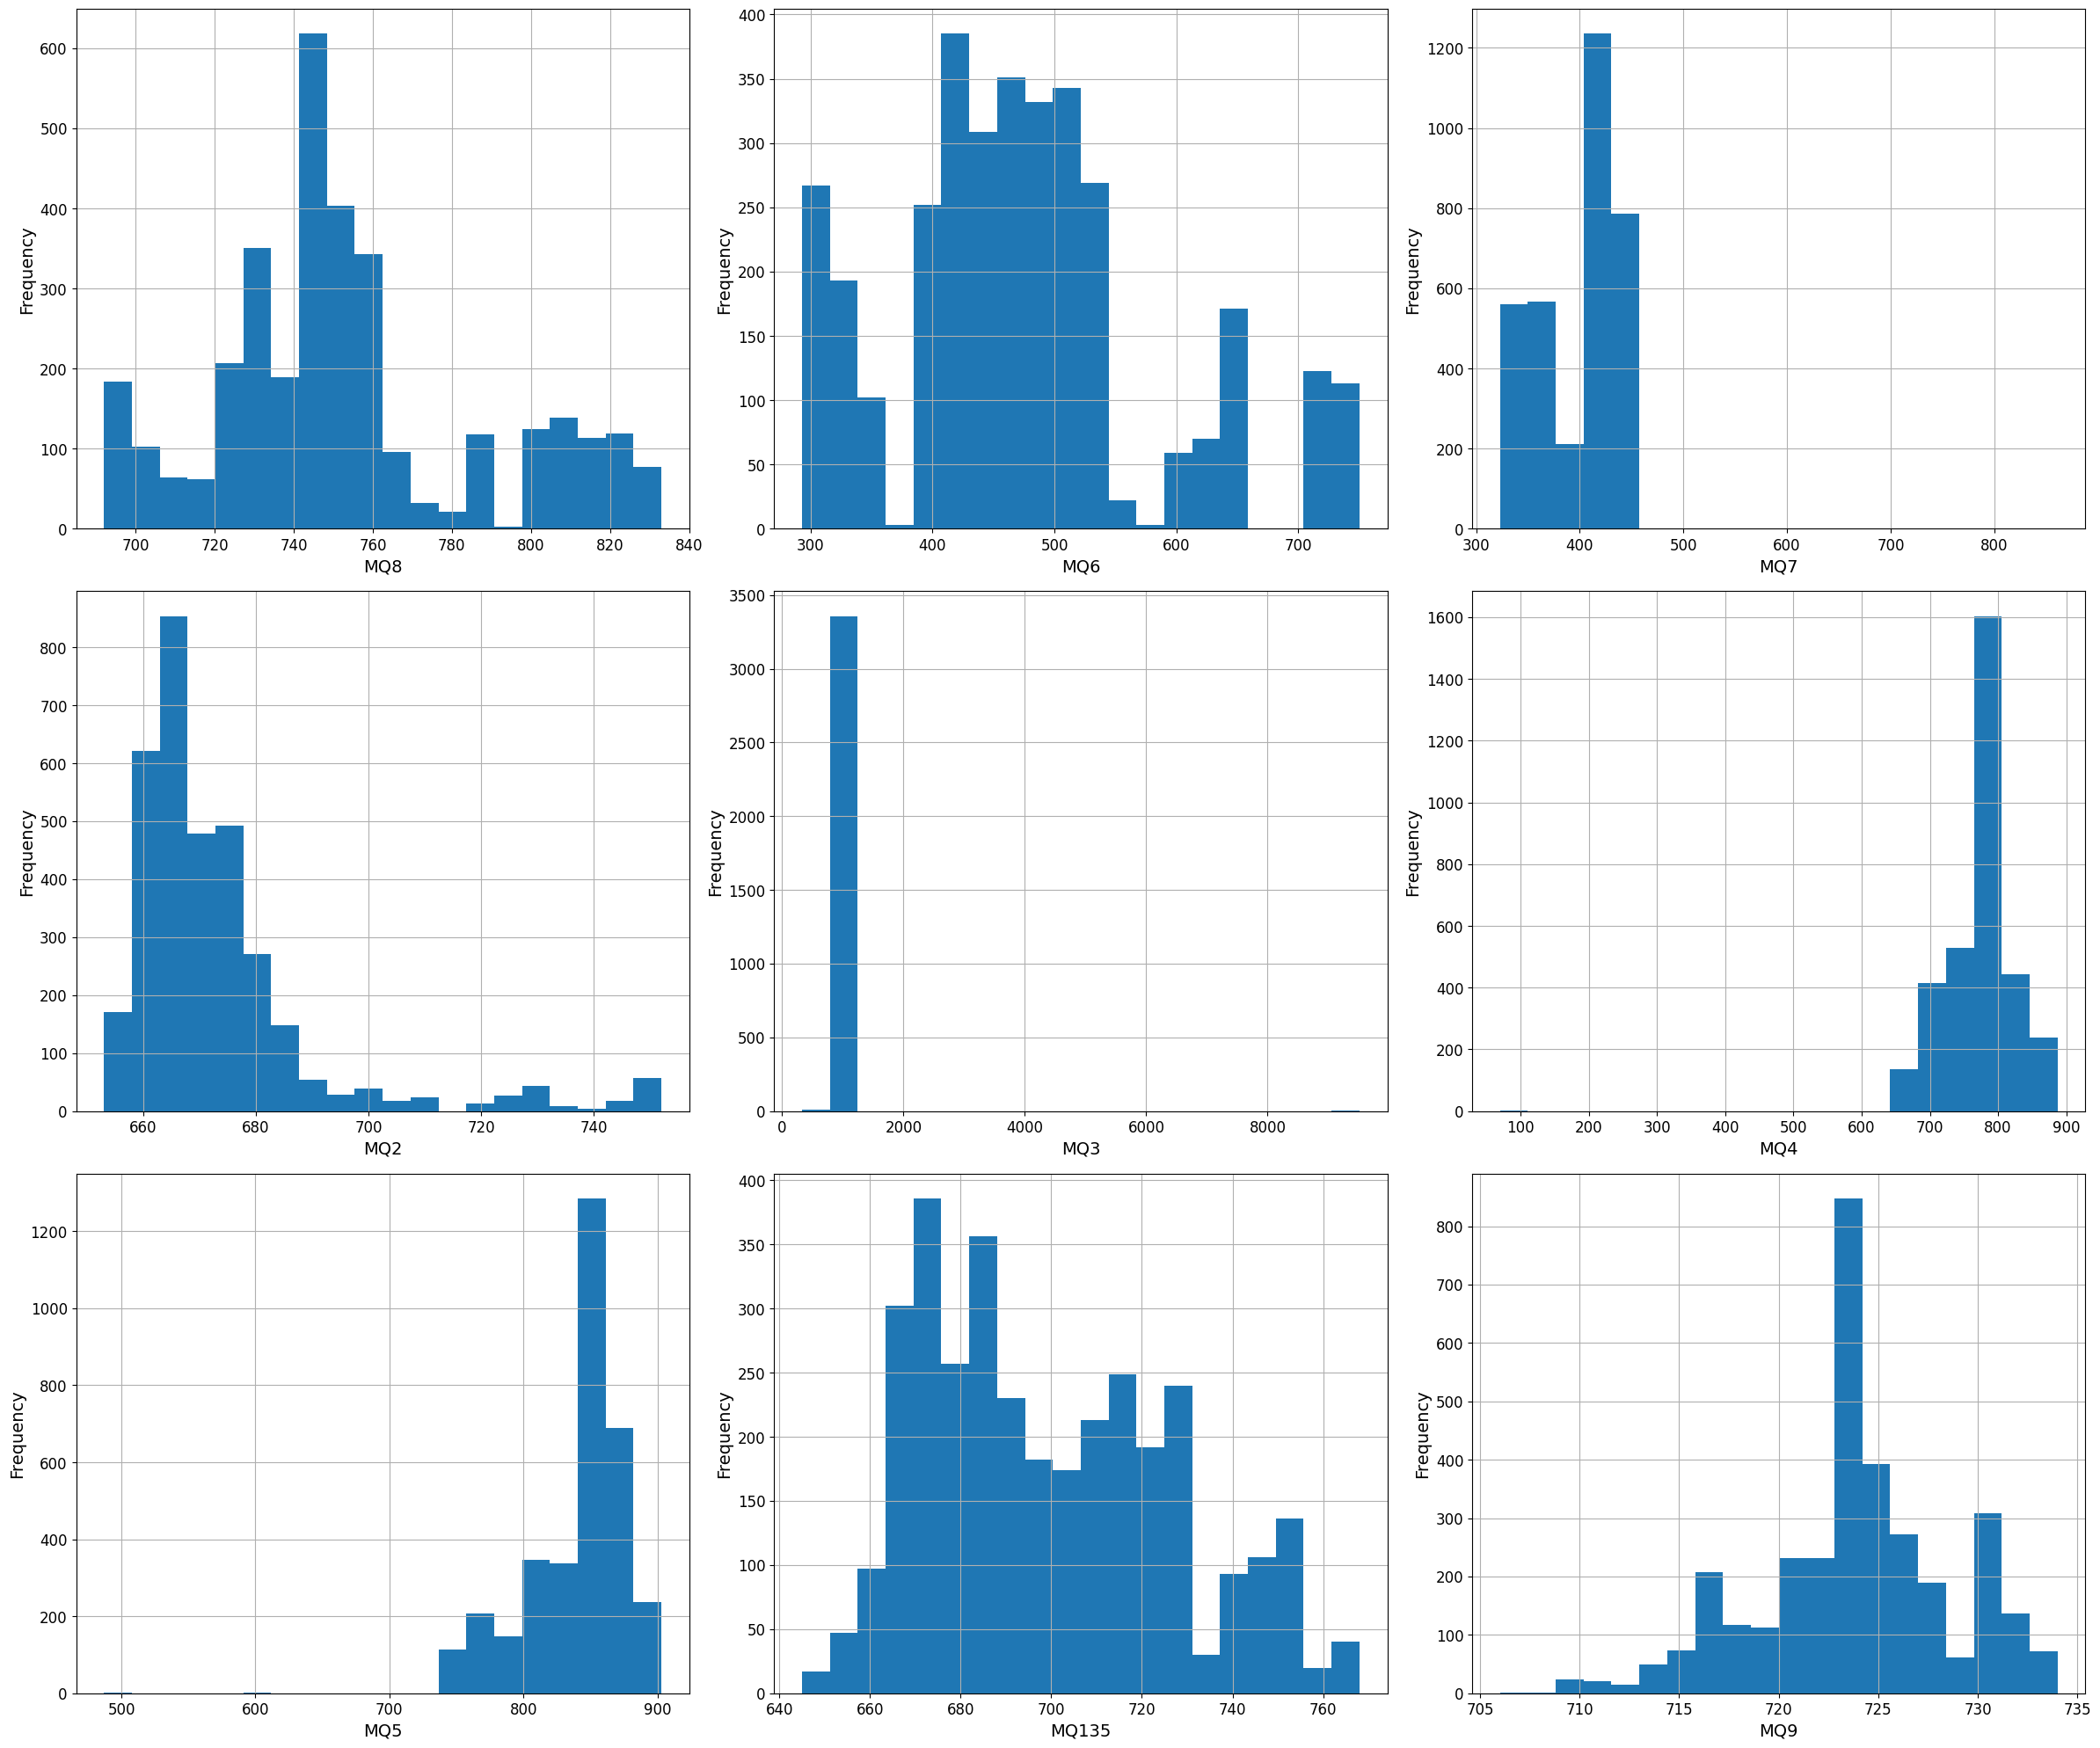

In [80]:
# plot histogram to check distribution of MQ sensors

fig, axes = plt.subplots(3, 3, figsize=(24, 20))

# List of MQ sensor columns
# columns = ['MQ8', 'MQ6', 'MQ7', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ135', 'MQ9']

# Loop through each subplot and plot the histogram for each column
for i, ax in enumerate(axes.flat):
    if i < len(columns):  # Ensure we only plot existing columns
        df[columns[i]].hist(bins=20, ax=ax)  # Plot histogram
        ax.set_xlabel(columns[i], fontsize=14)  # Set x-axis label with larger font
        ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label
        ax.tick_params(axis='x', labelsize=12)  # Increase font size for x-axis ticks
        ax.tick_params(axis='y', labelsize=12)  # Increase font size for y-axis ticks

# Adjust layout and display
plt.tight_layout()
plt.show()


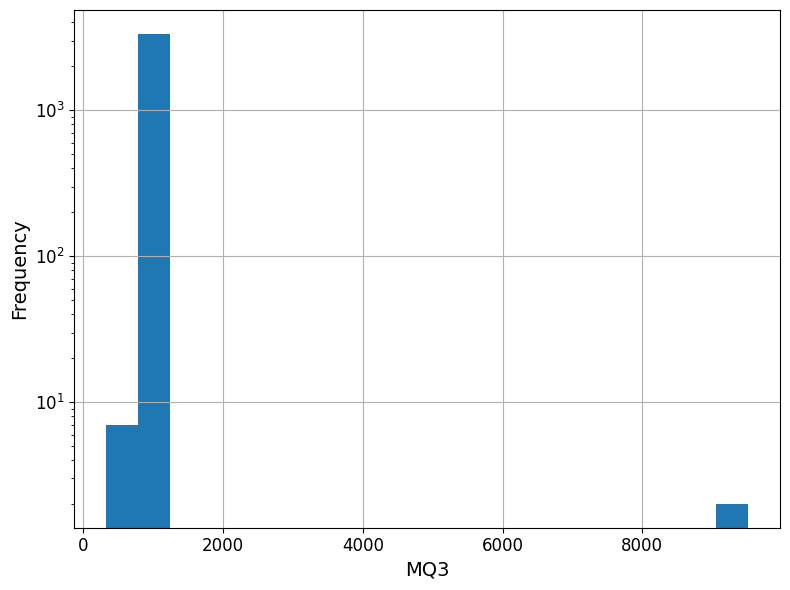

In [81]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [82]:
# Remove rows where MQ3 value is greater than 2000
df = df[df['MQ3'] <= 2000]

# Verify that rows have been removed
print(df.shape)


(3365, 15)


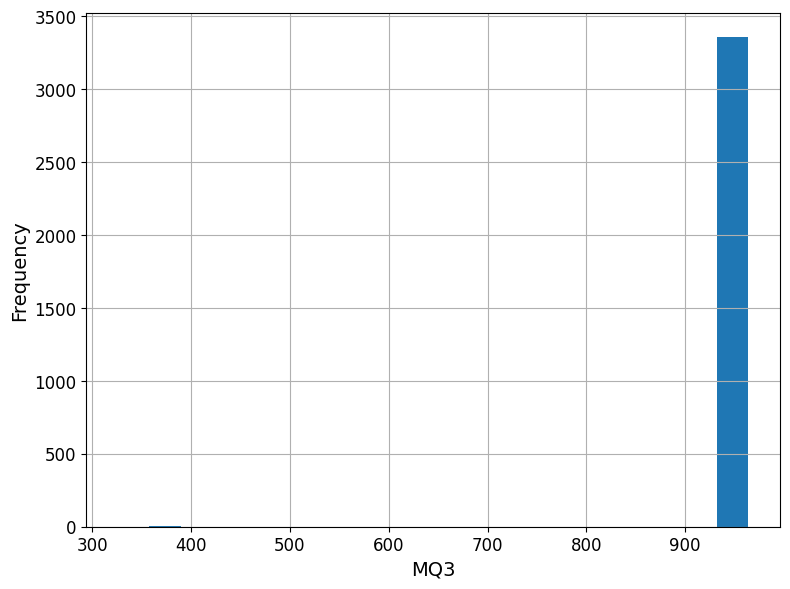

In [83]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [84]:
# Count the rows where MQ3 value is less than or equal to 600
count_mq3_leq_600 = df[df['MQ3'] <= 600].shape[0]

# Display the result
print(f"Number of rows where MQ3 value is <= 600: {count_mq3_leq_600}")


Number of rows where MQ3 value is <= 600: 6


In [85]:
# Drop rows where MQ3 value is less than or equal to 600
df = df[df['MQ3'] > 600]

# Verify that the rows have been removed
print(df.shape)


(3359, 15)


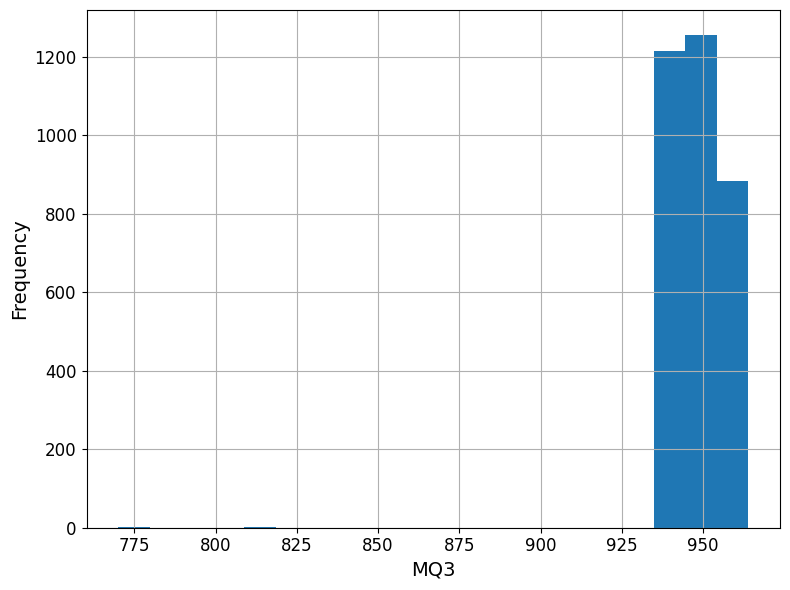

In [86]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()



In [87]:
# Count the rows where MQ3 value is less than or equal to 600
count_mq3_leq_600 = df[df['MQ3'] <= 900].shape[0]

# Display the result
print(f"Number of rows where MQ3 value is <= 900: {count_mq3_leq_600}")


Number of rows where MQ3 value is <= 900: 2


In [88]:
# Drop rows where MQ3 value is less than or equal to 600
df = df[df['MQ3'] > 900]

# Verify that the rows have been removed
print(df.shape)


(3357, 15)


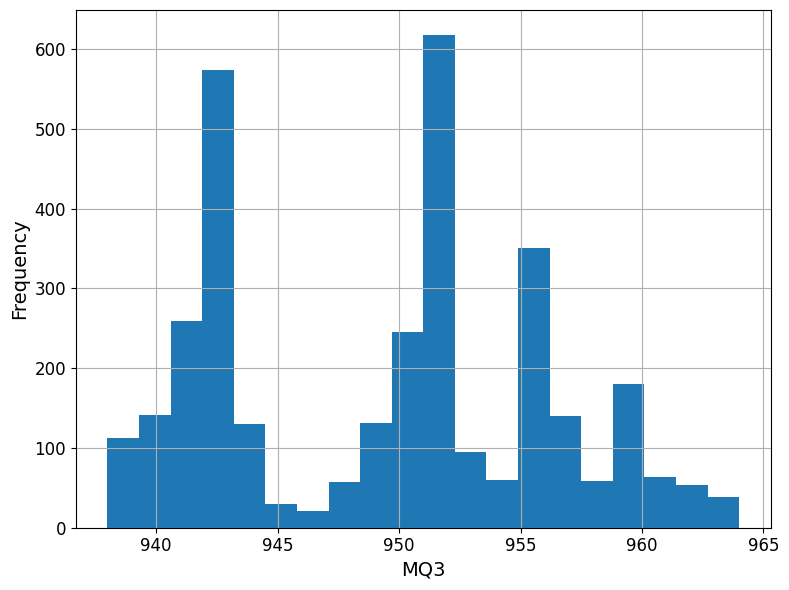

In [89]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()



In [90]:
# Must drop time stamp column:
# Drop a column from the DataFrame
df = df.drop(columns=['yyyy-mm-dd timestamp'])

# Alternatively, you can specify the axis
# df = df.drop('column_name', axis=1)

# Verify the DataFrame
print(df.head())


   MQ6  MQ5  MQ4  MQ7  MQ3  MQ8  MQ2  MQ135  MQ9  BMPTemperature  \
0  648  862  817  416  940  757  682    681  723           35.92   
1  647  862  815  417  939  758  683    679  724           35.94   
2  646  863  815  419  939  759  682    677  725           35.95   
3  648  862  816  416  941  758  682    678  724           35.96   
4  648  860  815  418  939  757  680    675  724           35.96   

   Pressure(Pa)  DHTTemperature  Humidity      Target  
0      83830.13            37.0      61.0  Sophie0916  
1      83587.56            37.0      61.0  Sophie0916  
2      83399.22            37.0      61.0  Sophie0916  
3      83237.08            37.0      61.0  Sophie0916  
4      83117.88            37.0      61.0  Sophie0916  


# Split Data

In [91]:
X = df.drop(['Target'], axis=1)

y = df['Target']

In [92]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [93]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2685, 13), (672, 13))

# Feature Scaling

In [94]:
cols = X_train.columns

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [97]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
count,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03,2.685000e+03
mean,-3.903354e-17,-1.116756e-15,7.991952e-16,1.931829e-16,2.635095e-15,-1.685720e-15,3.175610e-17,-1.567296e-15,8.320098e-15,-1.058537e-17,1.209378e-15,-1.190854e-17,-3.704878e-17
std,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00
min,-1.652458e+00,-2.690991e+00,-2.337563e+00,-1.989156e+00,-1.697495e+00,-1.825562e+00,-1.137136e+00,-1.978610e+00,-3.257870e+00,-4.695090e-02,-4.098342e+01,-1.958847e-02,-1.096531e+00
25%,-5.341479e-01,-5.412079e-01,-4.097574e-01,-8.795447e-01,-9.511508e-01,-6.350794e-01,-5.657912e-01,-8.385108e-01,-5.652847e-01,-3.263607e-02,-4.448716e-01,-1.958847e-02,-1.201442e-01
50%,-6.665753e-02,3.131931e-01,4.006389e-02,3.653850e-01,9.373080e-02,-1.588862e-01,-2.801187e-01,-1.765178e-01,5.608106e-02,-1.832124e-02,-1.133943e-01,-1.958847e-02,-1.165684e-02
75%,4.283322e-01,6.439290e-01,5.327253e-01,9.066587e-01,8.400748e-01,2.577828e-01,1.769574e-01,7.429170e-01,4.703249e-01,-7.773473e-03,3.559259e-01,-1.897496e-02,4.258686e-02
max,2.527455e+00,1.718821e+00,2.460531e+00,1.447933e+00,2.183494e+00,2.370890e+00,4.462045e+00,2.545009e+00,2.127300e+00,5.180136e+01,2.481460e+00,5.180733e+01,3.752498e+01


In [98]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000
